In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 200)

In [2]:
# Merged_data: Dados já integrados e valores "-99" e "-" tem valor NaN agora.
data = pd.read_csv("data/merged_data.csv")
data.head()

,hero_names,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,Fals

### Visualizando o balanceamento dos dados a serem preditos

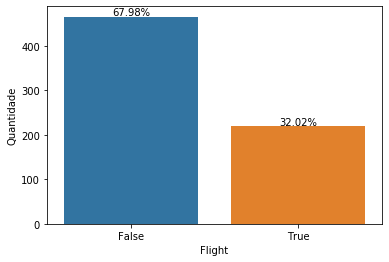

In [3]:
ax = sns.countplot(x="Flight", data=data)
total = data['Flight'].count()
ax.set(ylabel='Quantidade')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")
plt.show()

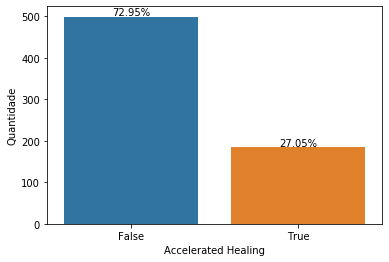

In [4]:
ax = sns.countplot(x="Accelerated Healing", data=data)
total = data['Accelerated Healing'].count()
ax.set(ylabel='Quantidade')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")
plt.show()

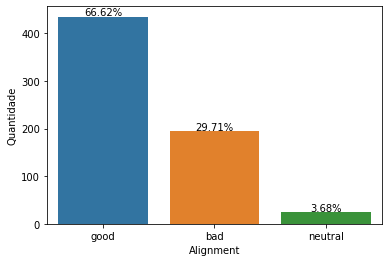

In [5]:
ax = sns.countplot(x="Alignment", data=data)
total = data['Alignment'].count()
ax.set(ylabel='Quantidade')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")
plt.show()

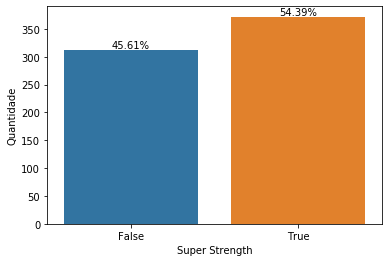

In [6]:
ax = sns.countplot(x="Super Strength", data=data)
total = data['Super Strength'].count()
ax.set(ylabel='Quantidade')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")
plt.show()

### Poderes mais comuns

In [7]:
poderes = data.select_dtypes(include='bool')
poderes.shape

(684, 167)

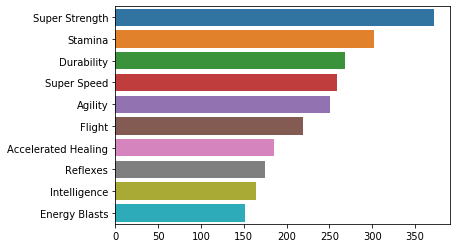

In [8]:
poderes_comuns = poderes.sum().sort_values(ascending=False)[0:10]
ax = sns.barplot(x = poderes_comuns, y = poderes_comuns.index)

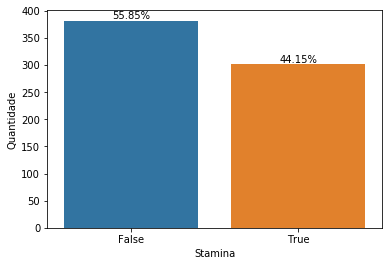

In [9]:
# Para escolher qual será o ultimo valor que vamos prever podemos procurar por um poder com valores bem 
# simetricos (balanceados), pois provavelmente a qualidade do preditor será melhor
ax = sns.countplot(x="Stamina", data=data)
total = data['Durability'].count()
ax.set(ylabel='Quantidade')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")
plt.show()

### Distribuição dos dados numericos

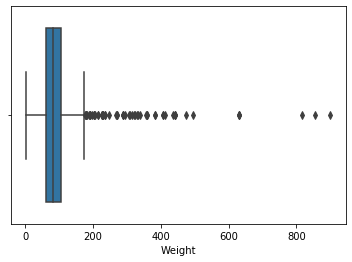

In [10]:
ax = sns.boxplot(x=data["Weight"])

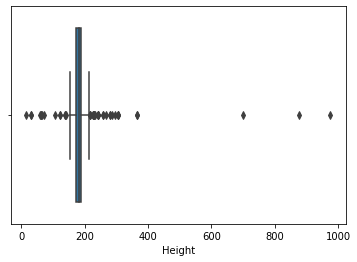

In [11]:
ax = sns.boxplot(x=data["Height"])

In [12]:
data[data['Height']>800]

,hero_names,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
230,Fin Fang Foom,Male,red,Kakarantharaian,No Hair,975.0,Marvel Comics,green,good,18.0,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
245,Galactus,Male,black,Cosmic Entity,Black,876.0,Marvel Comics,NaN,neutral,16.0,False,True,False,True,False,True,False,True,True,False,False,True,False,False,False,True,True,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,False

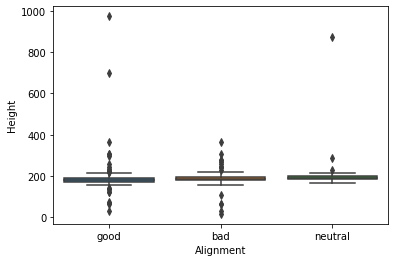

In [13]:
ax = sns.boxplot(x="Alignment", y="Height", data=data)

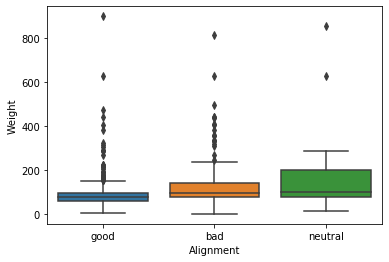

In [14]:
ax = sns.boxplot(x="Alignment", y="Weight", data=data)

- Tem alguns outliers, mas decidimos não remover, pois mesmo os valores sendo bem maior que a mediana o valor é real e não um erro
- A mediana dos dados numericos em relação ao tipos de alignment é parecido e não parece mostrar que esses dados numericos é capaz de prever alignment muito bem, pois eles tem muitos dados parecidos entre eles.

### Avaliando a capacidade que uma feature gender tem de separar os dados em relação a um valor que vamos ter que prever

In [15]:
alignment_per_gender = (data.groupby(['Gender'])['Alignment'].value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
                
alignment_per_gender

,Gender,Alignment,percentage
0,Female,good,78.089888
1,Female,bad,19.662921
2,Female,neutral,2.247191
3,Male,good,62.445415
4,Male,bad,33.624454
5,Male,neutral,3.930131


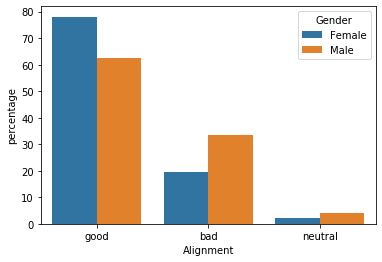

In [16]:
ax = sns.barplot(x="Alignment", y="percentage", hue="Gender", data=alignment_per_gender)

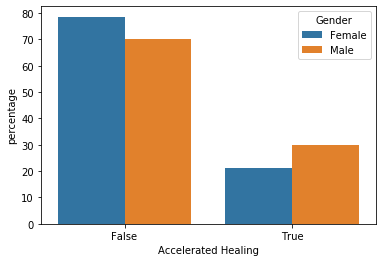

In [17]:
healing_per_gender = (data.groupby(['Gender'])['Accelerated Healing'].value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
                
ax = sns.barplot(x="Accelerated Healing", y="percentage", hue="Gender", data=healing_per_gender)

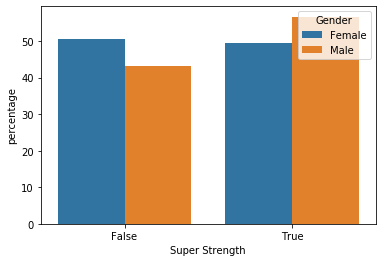

In [18]:
strength_per_gender = (data.groupby(['Gender'])['Super Strength'].value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
                
ax = sns.barplot(x="Super Strength", y="percentage", hue="Gender", data=strength_per_gender)

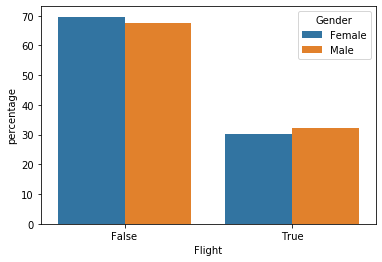

In [19]:
flight_per_gender = (data.groupby(['Gender'])['Flight'].value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
                
ax = sns.barplot(x="Flight", y="percentage", hue="Gender", data=flight_per_gender)

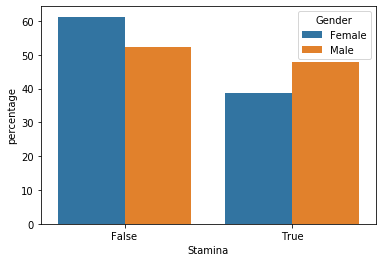

In [20]:
stamina_per_gender = (data.groupby(['Gender'])['Stamina'].value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
                
ax = sns.barplot(x="Stamina", y="percentage", hue="Gender", data=stamina_per_gender)

- A porcentagem é muito parecida entre os generos o que mostra que genero não é uma variavel tão boa para prever